In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning & Preprocessing

In [2]:
df = pd.read_csv('superstore.csv')
print(df)

      Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode  \
0          1  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1          2  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2          3  CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3          4  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4          5  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21-05-2017  28-05-2017  Standard Class   
9796    9797  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9797    9798  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9798    9799  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9799    9800  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   

     Customer_ID     Customer_Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [3]:
#delete unnecessary columns
df = df.drop(columns=['Row_ID','Customer_ID','Postal_Code','Product_ID'])
print(df)

            Order_ID  Order_Date   Ship_Date       Ship_Mode  \
0     CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1     CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2     CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3     US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4     US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...              ...         ...         ...             ...   
9795  CA-2017-125920  21-05-2017  28-05-2017  Standard Class   
9796  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9797  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9798  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9799  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   

         Customer_Name    Segment        Country             City       State  \
0          Claire Gute   Consumer  United States        Henderson    Kentucky   
1          Claire Gute   Consumer  United States        Henderson    

In [4]:
print(df.columns)

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name',
       'Segment', 'Country', 'City', 'State', 'Region', 'Category',
       'Sub_Category', 'Product_Name', 'Sales'],
      dtype='object')


In [5]:
print(df.isnull().sum())

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64


In [6]:
df = df.drop_duplicates()

print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9799, dtype: bool


In [7]:
#Date formatting

In [8]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"],dayfirst=True)
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"],dayfirst=True)
print(df["Order_Date"])
print(df["Ship_Date"])
df.to_csv("clean_supermarket.csv", index=False)

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order_Date, Length: 9799, dtype: datetime64[ns]
0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: Ship_Date, Length: 9799, dtype: datetime64[ns]


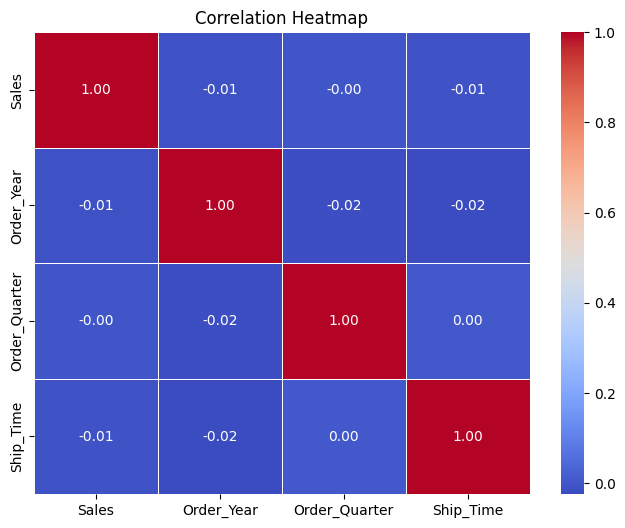

In [28]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Exploratory Data Analysis

**1. Sales trends over time**

In [9]:
df["Order_Year"] = df["Order_Date"].dt.year
df["Order_Month"] = df["Order_Date"].dt.to_period("M")
df["Order_Quarter"] = df["Order_Date"].dt.quarter
sales_trend_annual = df.groupby("Order_Year")["Sales"].sum()
sales_trend_month = df.groupby("Order_Month")["Sales"].sum()
sales_trend_quarter = df.groupby("Order_Quarter")["Sales"].sum()
print(sales_trend_annual)
print(sales_trend_month)
print(sales_trend_quarter)

Order_Year
2015    479574.8361
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64
Order_Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27625.4830
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.

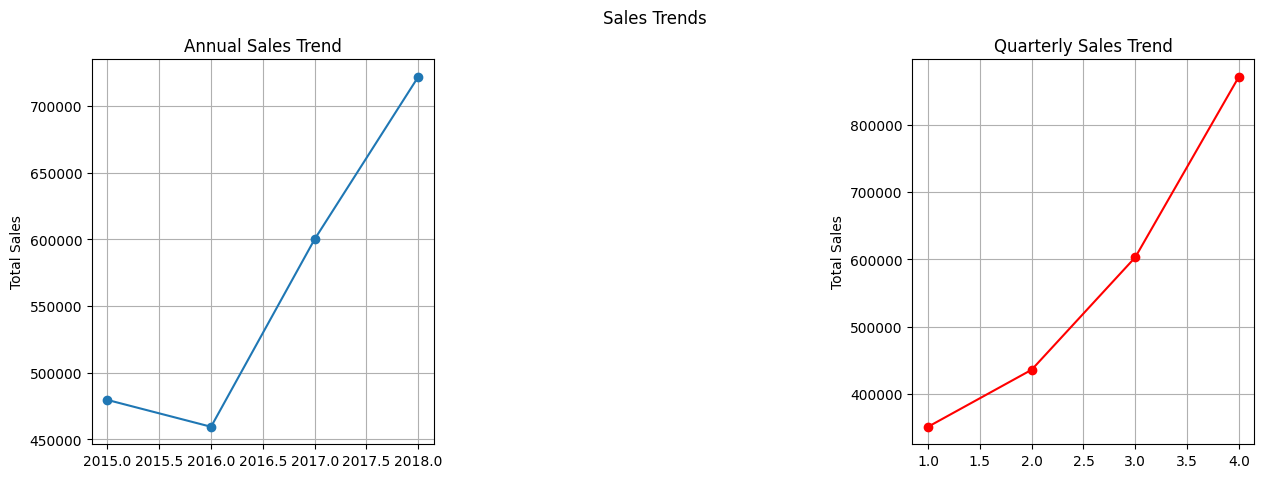

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(sales_trend_annual.index,sales_trend_annual.values,marker='o')
plt.grid()
plt.ylabel("Total Sales")
plt.title("Annual Sales Trend")

plt.subplot(1,3,3)
plt.plot(sales_trend_quarter.index,sales_trend_quarter.values,marker='o',color="red",mfc="red",mec="red")
plt.ylabel("Total Sales")
plt.title("Quarterly Sales Trend")
plt.grid()

plt.suptitle("Sales Trends")
plt.show()

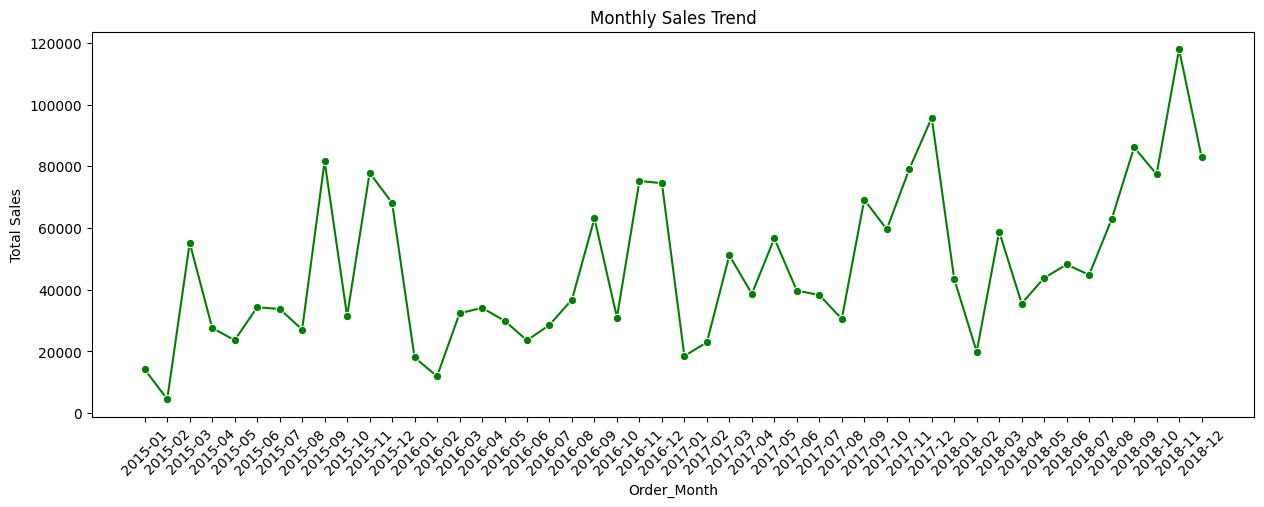

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(x=sales_trend_month.index.astype(str), y=sales_trend_month.values, marker="o", color="green")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.show()

**2. Regional Sales Performance**

In [12]:
sales_state = df.groupby("State")["Sales"].sum().nlargest(5)
sales_city = df.groupby("City")["Sales"].sum().nlargest(5)
sales_region = df.groupby("Region")["Sales"].sum().nlargest(4)
print(sales_state)
print(sales_city)
print(sales_region)

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Name: Sales, dtype: float64
City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
Name: Sales, dtype: float64
Region
West       710219.6845
East       669237.3540
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


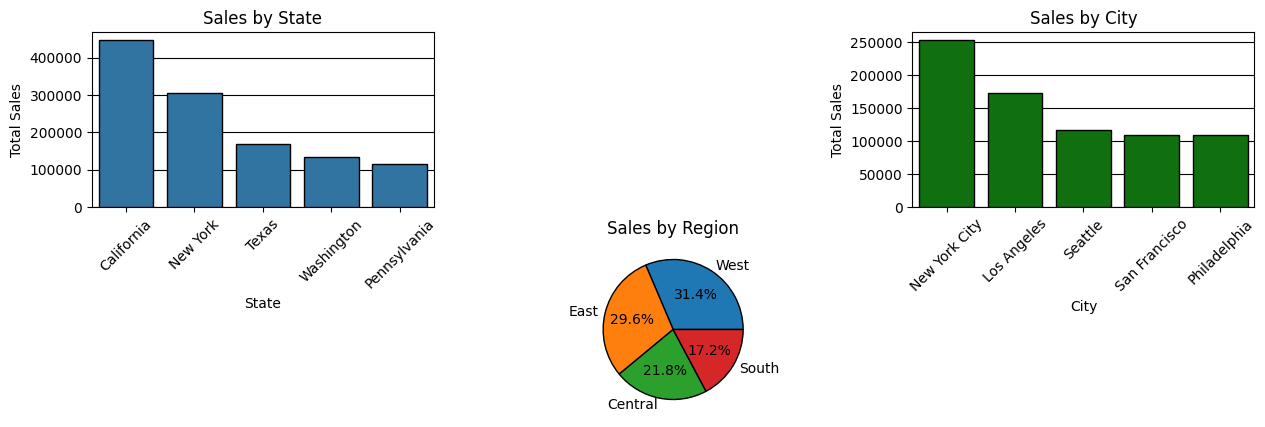

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
sns.barplot(x=sales_state.index,y=sales_state.values,edgecolor="black",zorder=3)
plt.grid(axis="y",color="black")
plt.ylabel("Total Sales")
plt.title("Sales by State")
plt.xticks(rotation=45)

plt.subplot(2,3,3)
sns.barplot(x=sales_city.index,y=sales_city.values,edgecolor="black",zorder=3,color="green")
plt.grid(axis="y",color="black")
plt.ylabel("Total Sales")
plt.title("Sales by City")
plt.xticks(rotation=45)

plt.subplot(2,3,5)
plt.pie(sales_region.values,labels=sales_region.index,autopct="%1.1f%%",wedgeprops={"edgecolor": "black"})
plt.title("Sales by Region")
plt.show()

**3.Top Selling Categories**

In [14]:
sales_category = df.groupby("Category")["Sales"].sum().nlargest(10)
sales_subcat = df.groupby("Sub_Category")["Sales"].sum().nlargest(5)
sales_product = df.groupby("Product_Name")["Sales"].sum().nlargest(5)
print(sales_category)
print(sales_subcat)
print(sales_product)

Category
Technology         827455.8730
Furniture          728377.2037
Office Supplies    705422.3340
Name: Sales, dtype: float64
Sub_Category
Phones     327782.448
Chairs     322541.359
Storage    219343.392
Tables     202810.628
Binders    200028.785
Name: Sales, dtype: float64
Product_Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


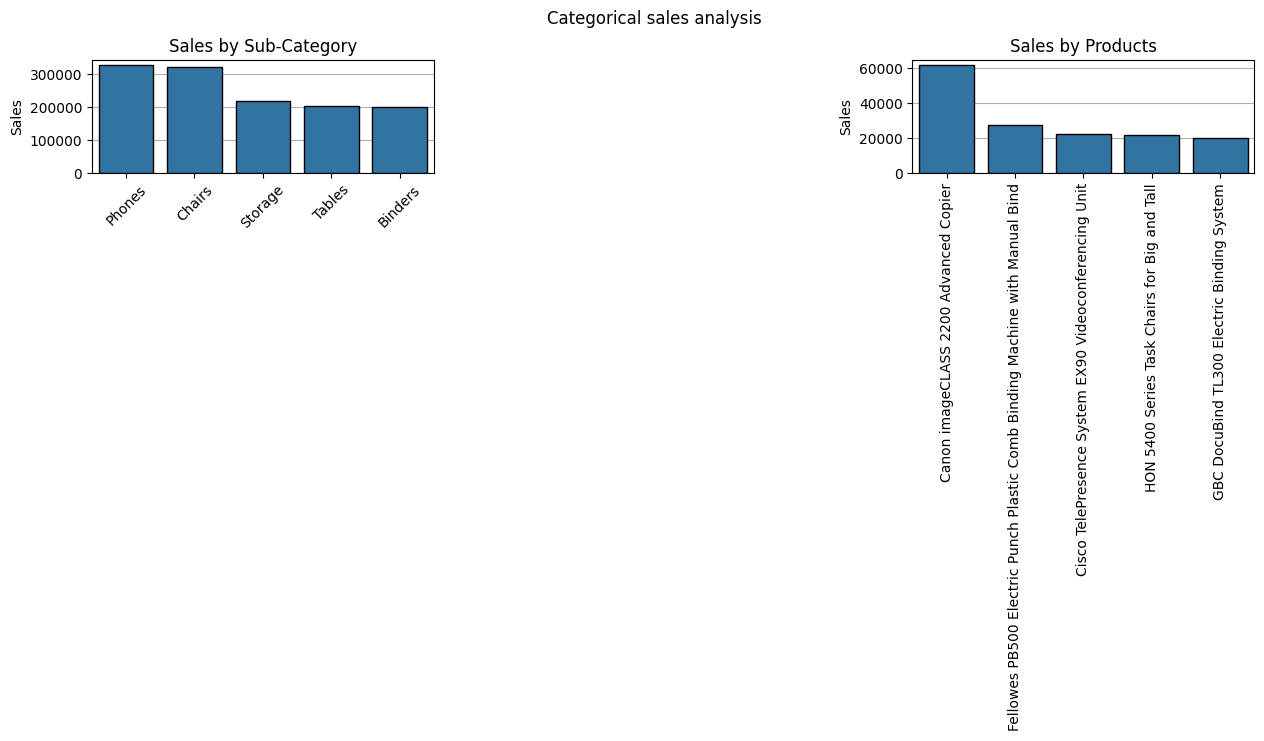

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(3,3,1)
sns.barplot(x=sales_subcat.index,y=sales_subcat.values,edgecolor="black",zorder=3)
plt.title("Sales by Sub-Category")
plt.xlabel("")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.subplot(3,3,3)
sns.barplot(x=sales_product.index,y=sales_product.values,edgecolor="black",zorder=3)
plt.title("Sales by Products")
plt.xlabel("")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.suptitle("Categorical sales analysis")
plt.show()

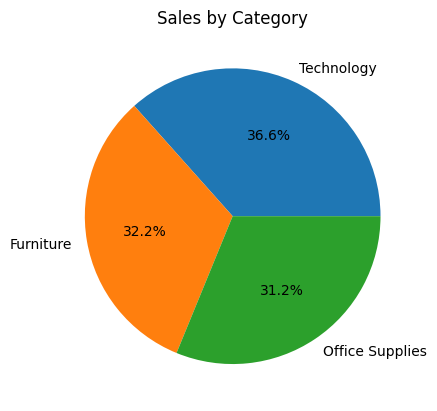

In [25]:
plt.pie(sales_category.values,labels=sales_category.index,autopct="%1.1f%%")
plt.title("Sales by Category")
plt.show()

**4.Top Customers & Customer Types**

In [16]:
sales_cust = df.groupby("Customer_Name")["Sales"].sum().nlargest(5)
cust_type = df.groupby("Segment")["Sales"].sum().nlargest(5)
print(sales_cust)
print(cust_type)

Customer_Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64
Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.247008e+05
Name: Sales, dtype: float64


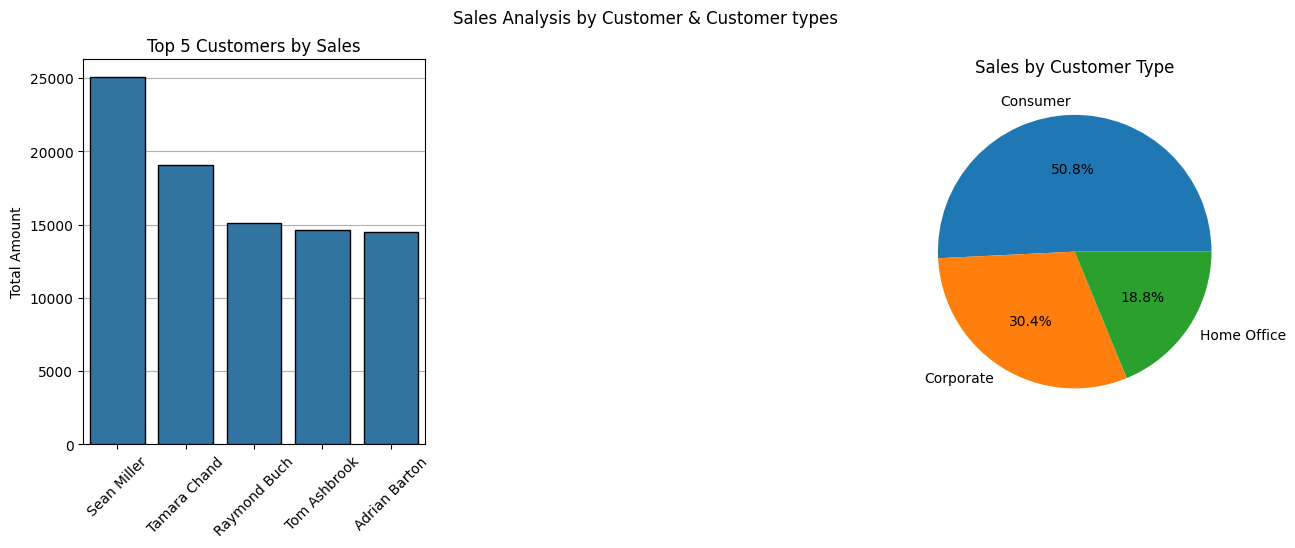

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=sales_cust.index,y=sales_cust.values,edgecolor="black",zorder=3)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Amount")
plt.title("Top 5 Customers by Sales")

plt.subplot(1,3,3)
plt.pie(cust_type.values,labels=cust_type.index,autopct="%1.1f%%")
plt.title("Sales by Customer Type")
plt.suptitle("Sales Analysis by Customer & Customer types")
plt.show()

**5. Shipping Performance Analysis**

In [18]:
df["Ship_Time"] = (df["Ship_Date"] - df["Order_Date"]).dt.days
print(df["Ship_Time"].describe())

count    9799.000000
mean        3.961118
std         1.749703
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Ship_Time, dtype: float64


In [19]:
mode = df.groupby("Ship_Mode")["Ship_Time"].sum()
print(mode)

Ship_Mode
First Class        3271
Same Day             24
Second Class       6180
Standard Class    29340
Name: Ship_Time, dtype: int64


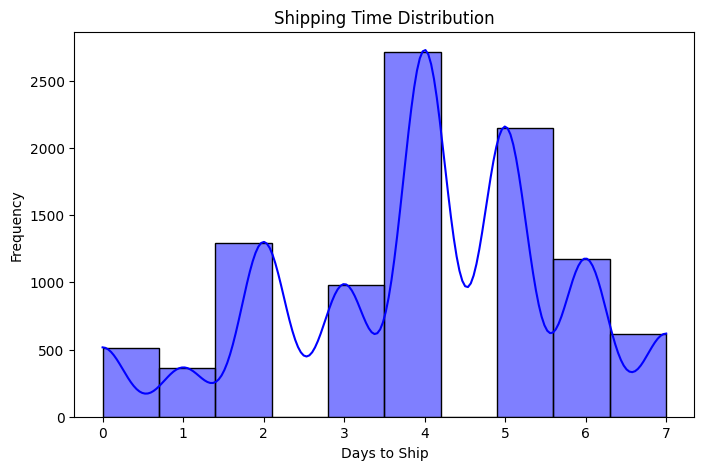

In [20]:
#Delays
plt.figure(figsize=(8,5))
sns.histplot(df["Ship_Time"],bins=10, kde=True,color="blue")
plt.title("Shipping Time Distribution")
plt.xlabel("Days to Ship")
plt.ylabel("Frequency")
plt.show()

**6. Average Order Value**

In [21]:
aov = df["Sales"].sum() / df["Order_ID"].nunique()
print(f"Average Order Value: ${aov:.2f}")

Average Order Value: $459.42


In [22]:
aov_category = df.groupby("Category")["Sales"].sum() / df.groupby("Category")["Order_ID"].nunique()
print(aov_category)

Category
Furniture          421.758659
Office Supplies    191.899438
Technology         544.737244
dtype: float64


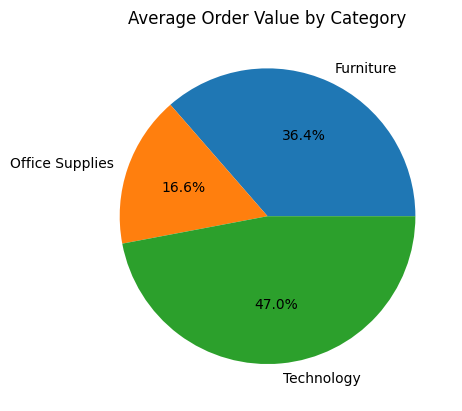

In [23]:
aov_category.plot(kind="pie",autopct="%1.1f%%")
plt.title("Average Order Value by Category")
plt.xticks(rotation=45)
plt.show()

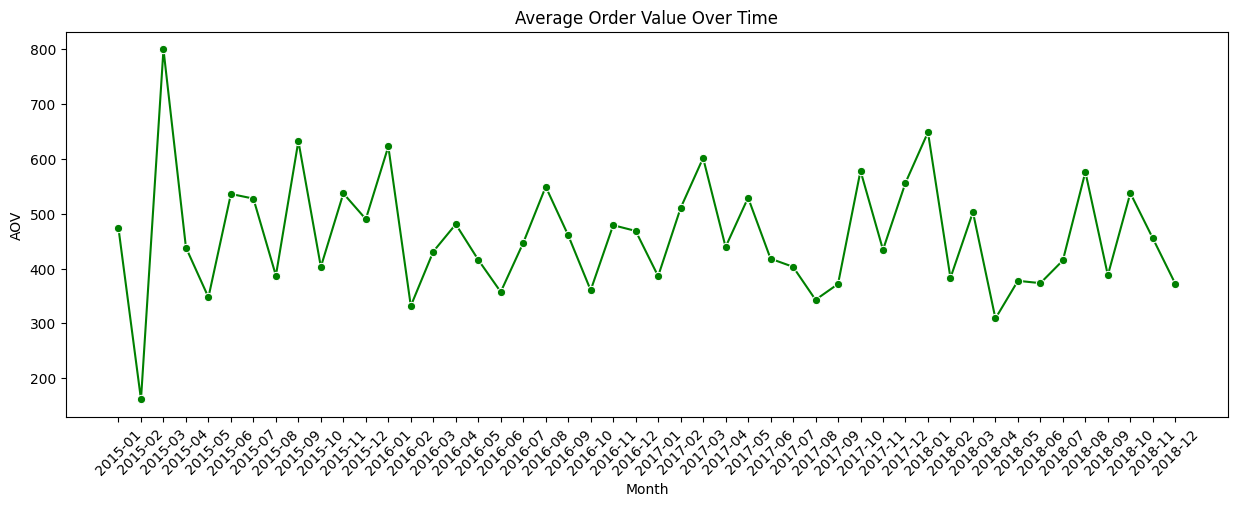

In [24]:
df["Month"] = df["Order_Date"].dt.to_period("M")

aov_monthly = df.groupby("Month")["Sales"].sum() / df.groupby("Month")["Order_ID"].nunique()

plt.figure(figsize=(15, 5))
sns.lineplot(x=aov_monthly.index.astype(str), y=aov_monthly.values, marker="o", color="green")
plt.xticks(rotation=45)
plt.title("Average Order Value Over Time")
plt.ylabel("AOV")
plt.xlabel("Month")
plt.show()


# Reporting & Insights

__1.Introduction__

**This report provides an in-depth analysis of sales performance using historical transaction data. The key objectives are to:  
-Identify trends and patterns in sales performance.  
-Evaluate regional and category-wise performance.  
-Assess customer behavior and order trends.  
-Provide data-driven recommendations for improvement.**  

__2.Key Findings__

__A. Sales Trends Over Time__

**-The highest sales occurred in November, 2018, indicating peak demand during this period.  
-A consistent growth trend was observed from year 2016.    
-A peak is in the period of November in every year from 2016.  
-Sales have increased in every quarter.  
-Seasonal fluctuations suggest that sales decrease during [festive seasons, holidays, etc.].**  
  
**Actionable Insight:  
-Focus marketing efforts and promotional campaigns during peak sales months.  
-Focus on improving sales during festivals, holiday season i.e. during January.**

__B. Regional Performance Analysis__

**-The West region contributed the highest revenue, accounting for 31.4% of total sales.  
-The California State, contributed the highest revenue.  
-The New York City, is top in the sales.  
-South region showed the lowest sales, indicating potential operational or market challenges.**

**Actionable Insight:  
-Increase targeted marketing in underperforming regions.  
-Optimize logistics and supply chain efficiency in low-sales regions.**

__C. Product Category Performance__

**-The Best-Selling Category Technology contributed 36.6% of total revenue.    
-The Least Selling Category i.e. Office Supplies had low sales, possibly due to lack of demand or competition.      
-The Best-Selling Sub-Category Phones contributed 300k of revenue.        
-The Best-Selling Product Canon copier contributed 60k of revenue.  
-The Least selling product is Eureka Disposable Bags which only contributed 1 dollar.**

**Actionable Insight:  
-Expand inventory and promotions for top-performing categories.  
-Reevaluate pricing, marketing, or discontinuation strategies for slow-moving product.**

__D. Customer Behavior & Segmentation__

**-7% of revenue was generated by top 10 customers, showing strong repeat purchases.  
-The Best-Selling Segment i.e. Consumer generated the highest sales.**

**Actionable Insight:  
-Implement loyalty programs for high-value customers.  
-Personalize marketing for different customer segments to maximize engagement.**

__E. Shipping & Order Processing Performance__

**-The average order-to-ship time is 4 days.   
-The Fastest Shipping Mode i.e. Same Day ensures quicker deliveries, whereas Slowest Mode i.e. Standard causes delays.**

__F. Average Order Value (AOV) Analysis__

**-The Average Order Value (AOV) is 460 per order.    
-February, 2015 & Technology Category had the highest AOV, suggesting that premium products/bulk purchases are more common in this segment.  
-Conversely, Office supplies had a lower AOV, indicating smaller order sizes or lower-priced products.**

__3. Recommendations for Improvement__

**1.Boost Sales During Off-Peak Months: Offer discounts and promotions during low-sales months.  
2.Target High-Performing Regions & Segments: Increase investment in best-performing locations.  
3.Improve Customer Retention Strategies: Introduce loyalty rewards and personalized offers.  
4.Optimize Inventory for Demand Fluctuations: Forecast demand to prevent stockouts or excess inventory.  
5.Enhance Logistics & Shipping Efficiency: Reduce delivery times to improve customer satisfaction.**

__4. Conclusion__

**This analysis provides valuable insights into sales performance, regional dynamics, customer behavior, and shipping efficiency.   
Implementing these recommendations will drive revenue growth, enhance customer experience, and optimize business operations.**